# Capstone Project - NLP based Chatbot

**Group**: G9

**Batch**: AIML ONLINE JULY 23 A

**Team Members**:
* Anurag Rai
* Neha Gogia
* Prasanalakshmi Venkateswaralu
* Rahul Sagar
* Rohon Kuddus
* Suhail Chand





# Problem Statement

**DOMAIN**: Industrial Safety

**CONTEXT**: <br>
The  database  comes  fromone  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION**:<br>
This  The  database  is  basically  records  of  accidents  from12  different  plants  in  03  different  countrieswhich  every  line  in  the  data  is  an occurrence of an accident.

**Source**: https://www.kaggle.com/datasets/ihmstefanini/industrial-safety-and-health-analytics-database

| Attributes | Description |
| ------------- | ------------- |
| Data | timestamp or time/date information |
| Countries | which country the accident occurred (anonymised) |
| Local | the city where the manufacturing plant is located (anonymised) |
| Industry sector | which sector the plant belongs to |
| Accident level | from I to VI, it registers how severe was the accident (I means not severe but VI means very severe) |
| Potential Accident Level | depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident) |
| Genre | if the person is male of female |
| Employee or Third Party | if the injured person is an employee or a third party |
| Critical Risk | some description of the risk involved in the accident |
| Description | detailed description of how the accident happened | 

**PROJECT OBJECTIVE**:<br>
Design a ML/DL based chatbot utility which can help the professionals to **highlight the safety risk** as per the incident description.

# Imports

In [67]:
# Library to interact with the OS
import os

# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.4f' % x)

PROJECT_DIR = os.path.join(os.path.dirname('preprocessing.ipynb'), os.pardir)

In [68]:
is_df = pd.read_excel(f'{PROJECT_DIR}/data/raw/industrial_safety_and_health_database_with_accidents_description.xlsx')
is_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


# Overview

In [69]:
# Dataset Info
is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ KB


In [70]:
# Missing value count
is_df.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [71]:
# Dropping the index column
is_df.drop('Unnamed: 0', axis=1, inplace=True)

In [72]:
# Duplicates
is_df.duplicated().sum()

7

In [73]:
# Dropping duplicates
is_df.drop_duplicates(inplace=True, ignore_index=True)

In [74]:
print('Value Counts')
print('*'*50)
for col in is_df.columns:
    if col not in ['Data', 'Description']:
        print(is_df[col].value_counts())
        print('-'*50)

Value Counts
**************************************************
Countries
Country_01    248
Country_02    129
Country_03     41
Name: count, dtype: int64
--------------------------------------------------
Local
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64
--------------------------------------------------
Industry Sector
Mining    237
Metals    134
Others     47
Name: count, dtype: int64
--------------------------------------------------
Accident Level
I      309
II      40
III     31
IV      30
V        8
Name: count, dtype: int64
--------------------------------------------------
Potential Accident Level
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: count, dtype: int64
--------------------------------------------------
Genre
Male      396
Female     22
Name: count, dtype: int64
----------------------

In [75]:
# Rename 'Data', 'Countries', 'Genre' columns in Data frame
is_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender'}, inplace=True)

# Univariate Analysis

In [76]:
def labeled_barplot(data, feature, perc=False):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    
    """

    figure,axes = plt.subplots(nrows =1,ncols = 2,figsize=(20,10))
    data[feature].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
    total = len(data[feature])  # length of the column
    plt.xticks(rotation=90)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index,ax = axes[1]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:1.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
    ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

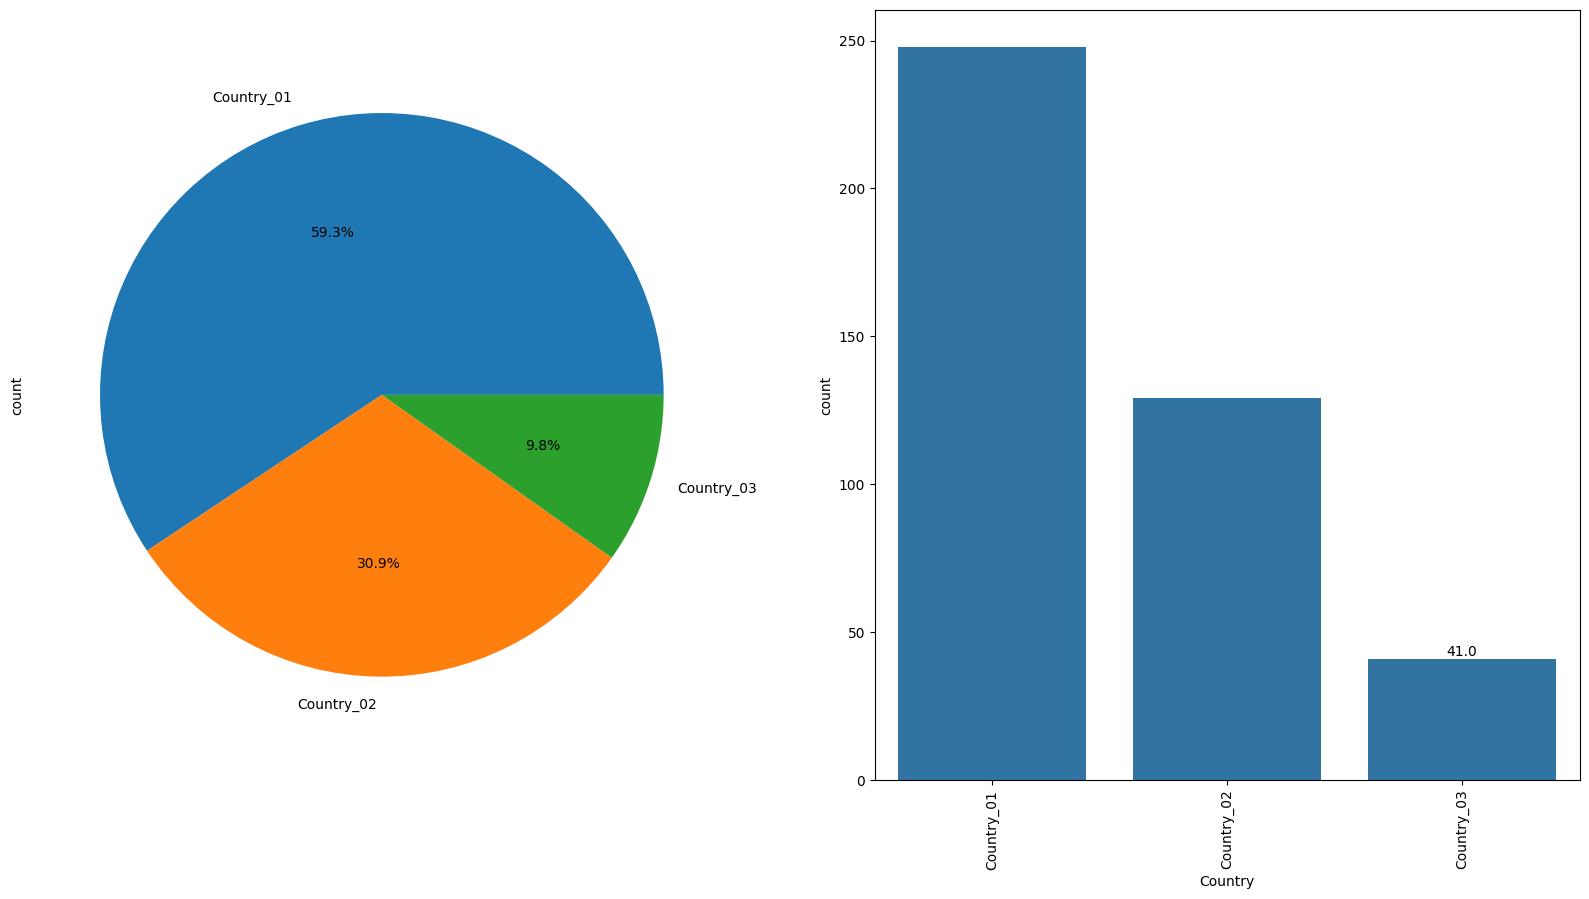

In [77]:
# Country distribution
labeled_barplot(is_df, 'Country', perc=False)

Higher percentage of accidents almost 59% has occured in `Country_01` Least percentage of accidents, 9.8% has occurred in `Country_03`.

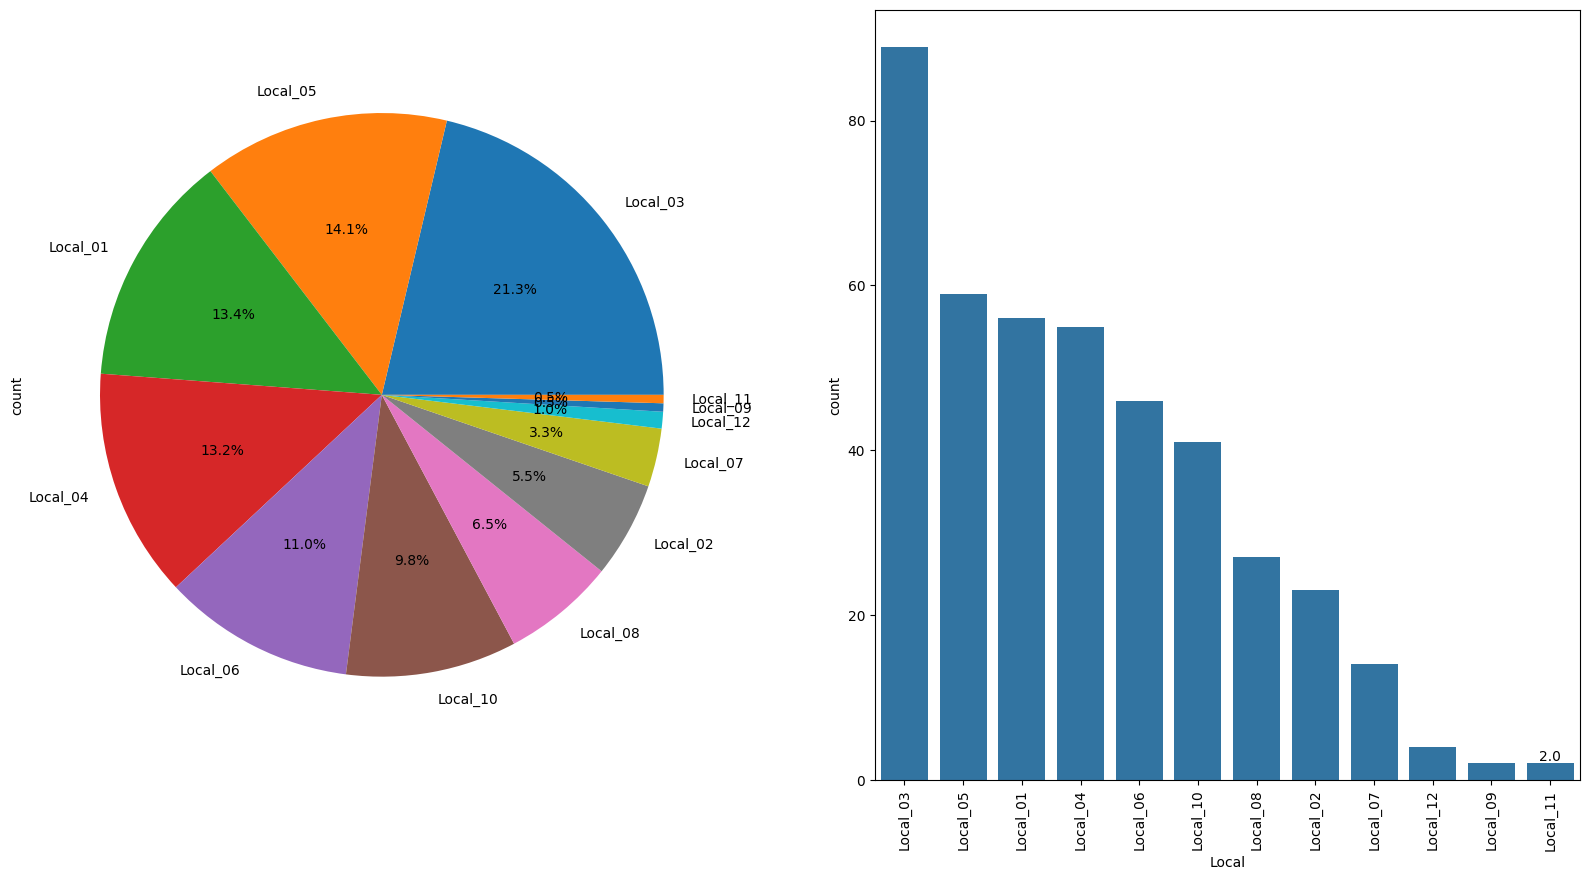

In [78]:
# Local region distribution
labeled_barplot(is_df, 'Local', perc=False)

Higher pecentage of accidents has occured in `Local_03` Second highest accident has occurred in `Local_05`.

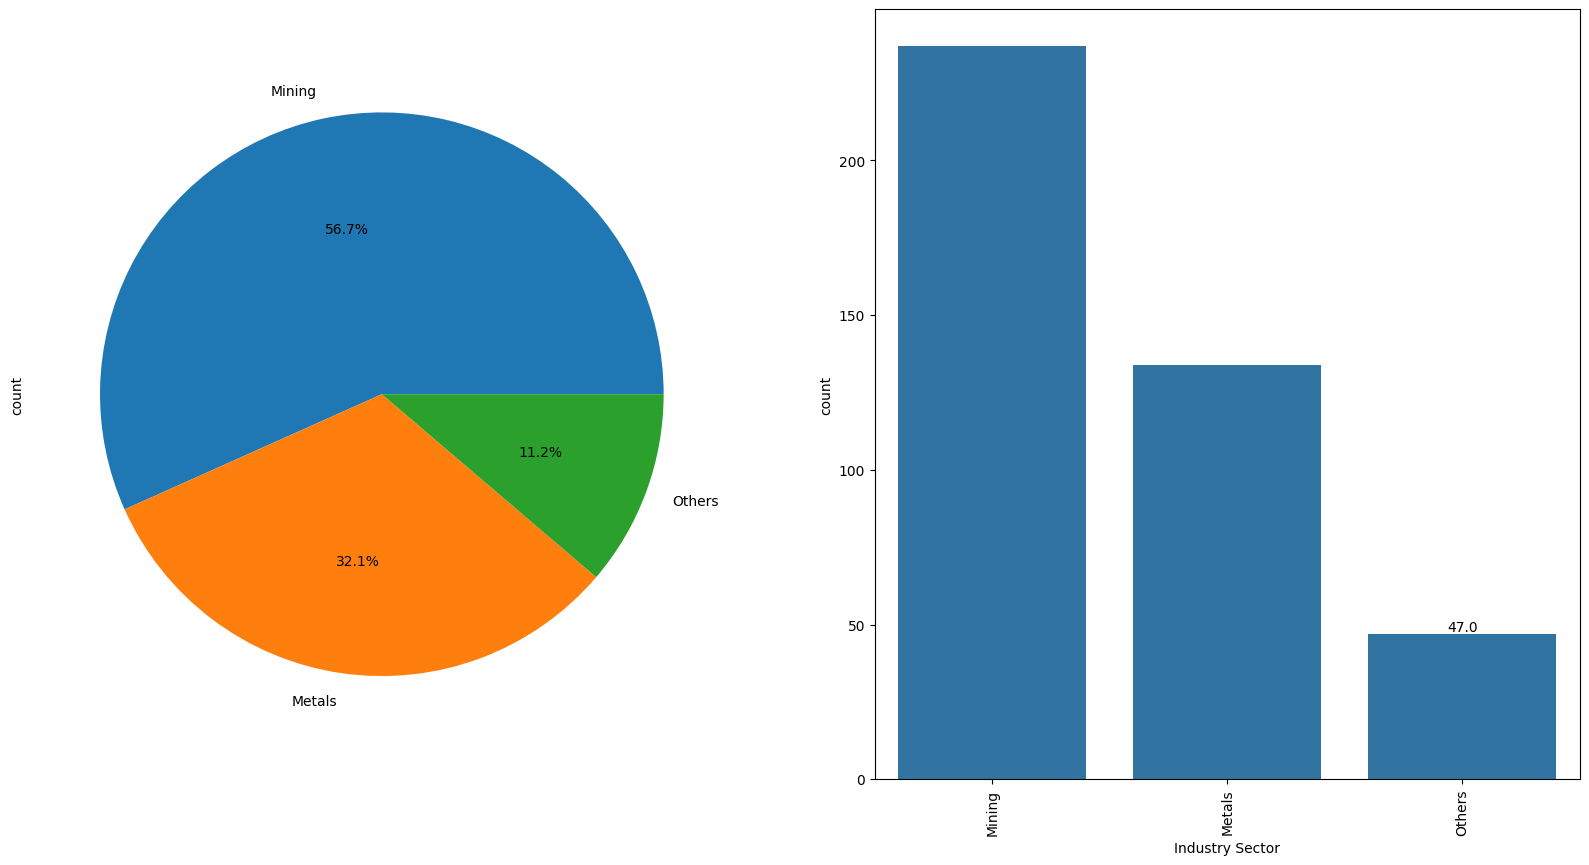

In [79]:
# Industry Sector distribution
labeled_barplot(is_df, 'Industry Sector', perc=False)

Higher percentage, ~ 56.7% of accidents has occurred in `Mining industy` Second highest in `Metals`.

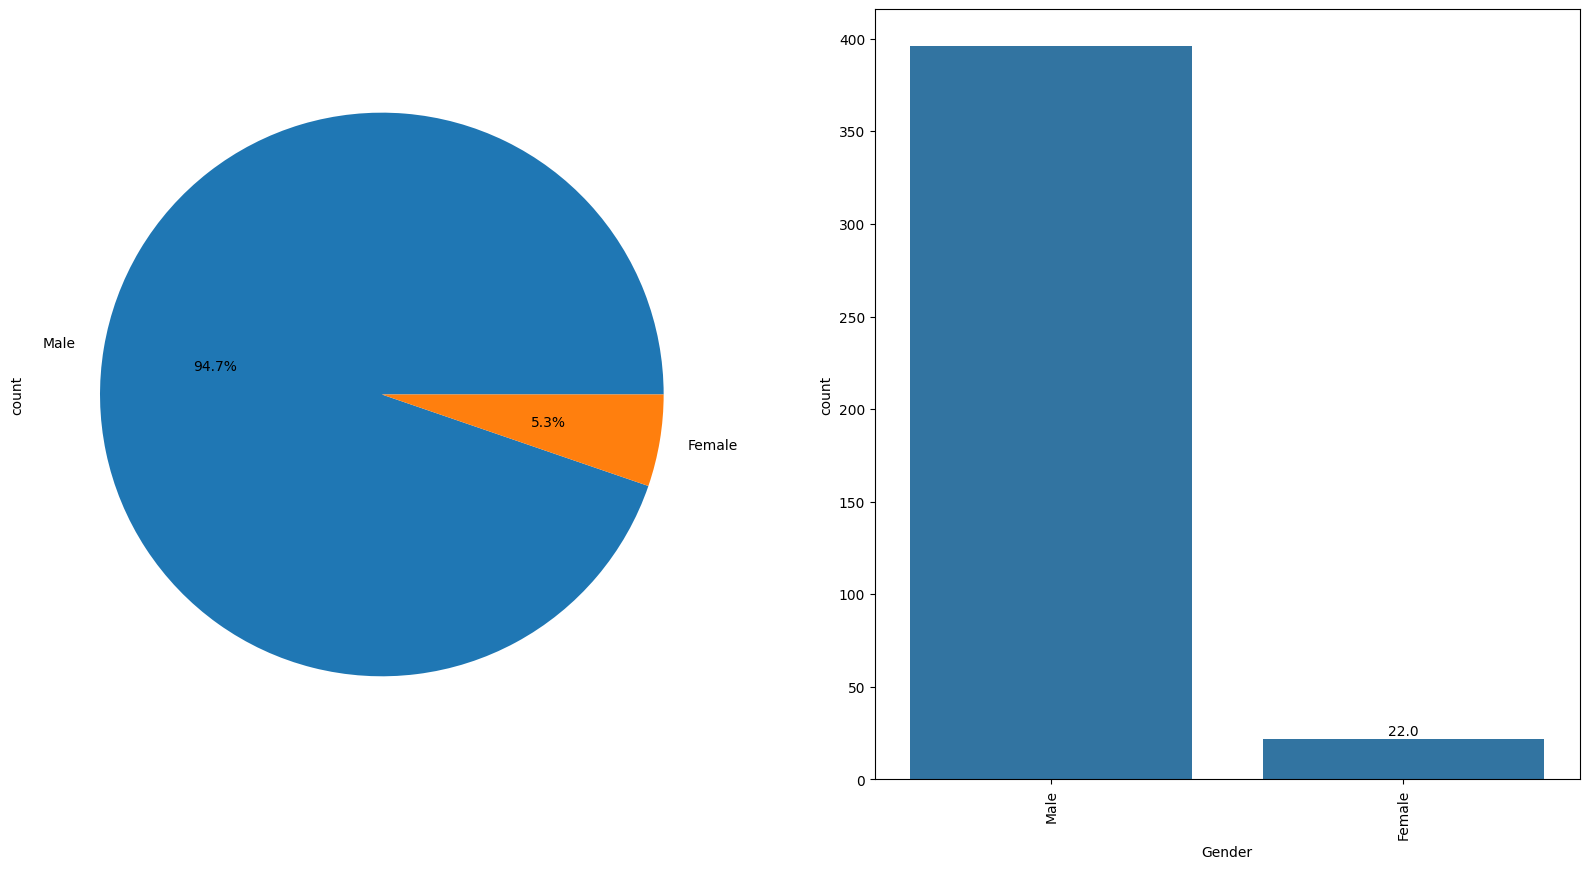

In [80]:
# Gender distribution
labeled_barplot(is_df, 'Gender', perc=False)

Men have undergone higher percentage of accidents around ~94.7% Women has less accident rate.

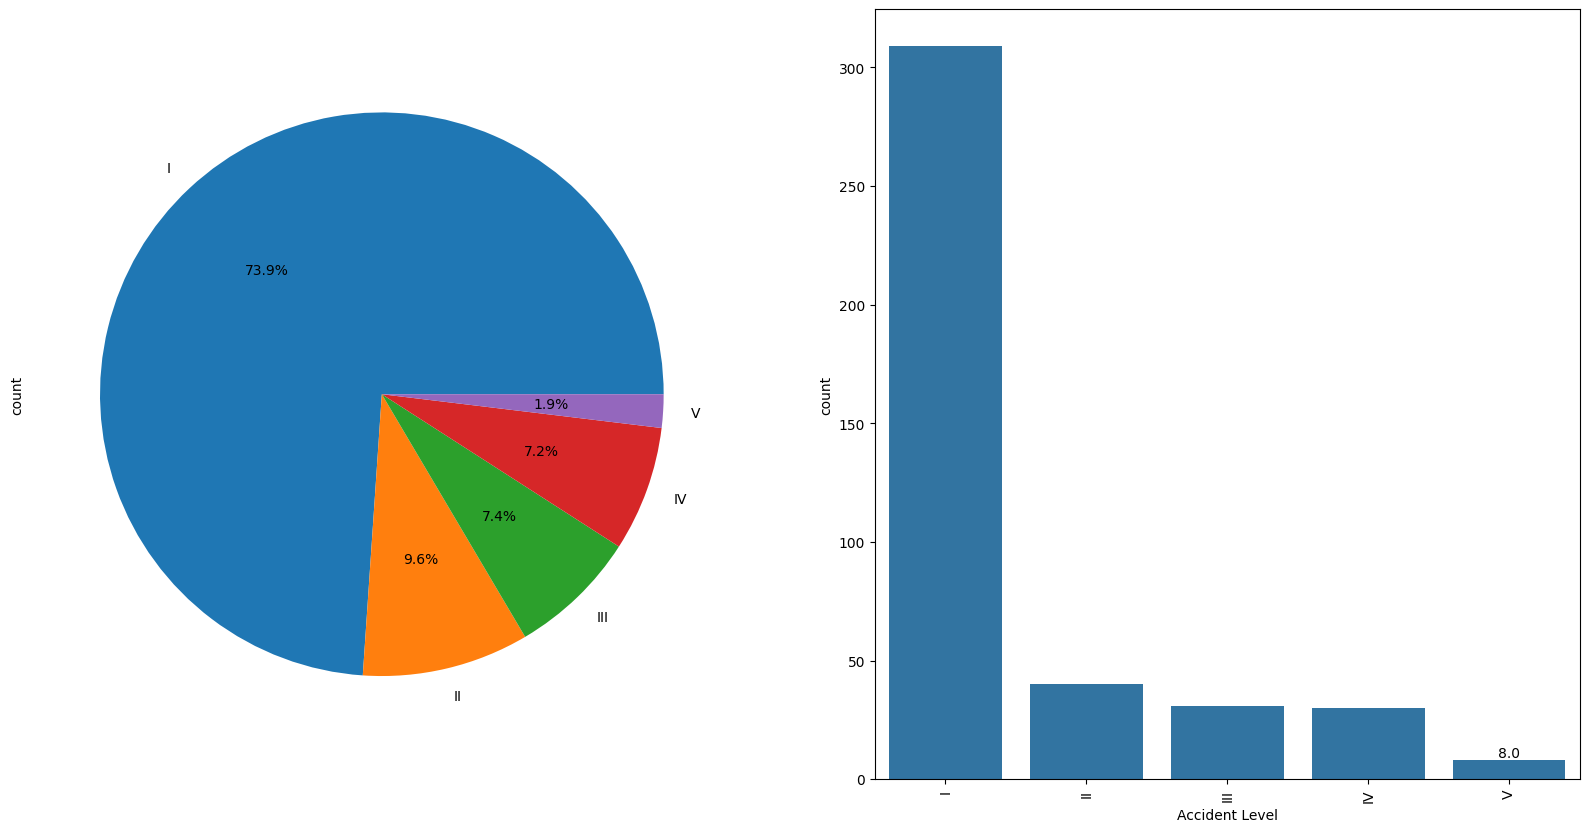

In [81]:
# Accident Level distribution
labeled_barplot(is_df, 'Accident Level', perc=False)

8% of accidents were very severe considering level `V` as highest severe. Higher no of accidents happened are less severe ~ 74 %.

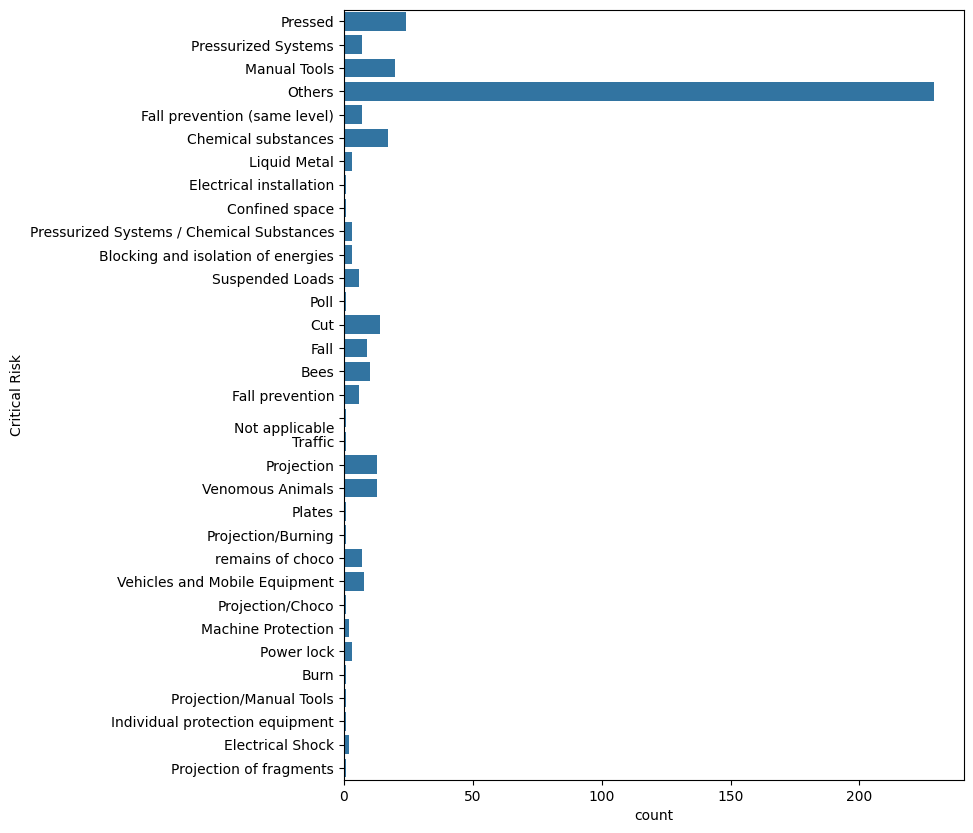

In [82]:
# Critical Risk distribution
plt.figure(figsize=(8, 10))
sns.countplot(is_df, y='Critical Risk');

Critical risk needs to further collected since most of the falls into other category. Pressed is the second most critical risk reported.

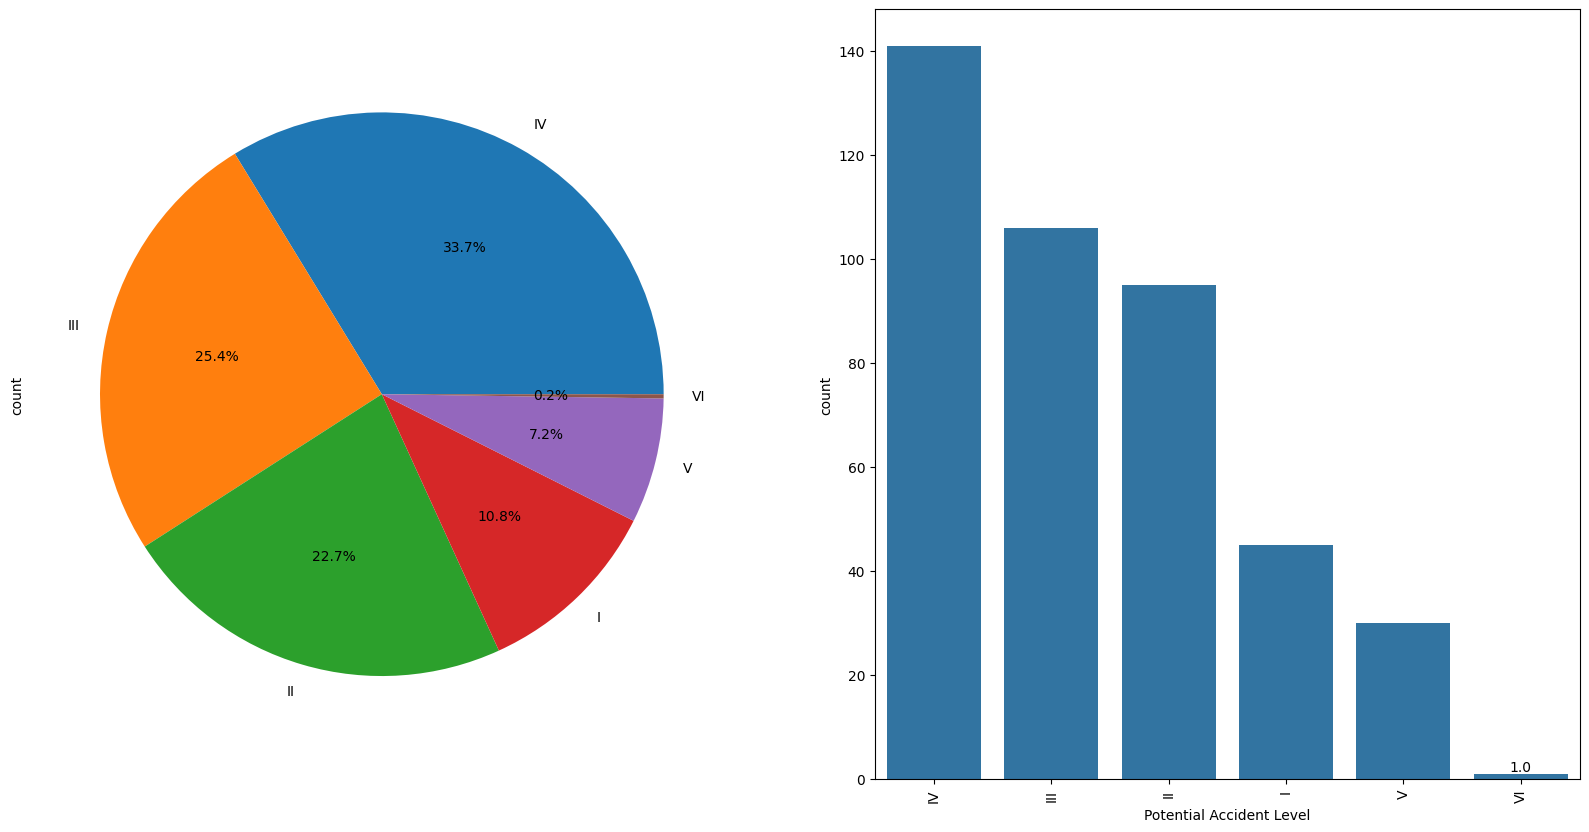

In [83]:
# Potential Accident Level distribution
labeled_barplot(is_df, 'Potential Accident Level', perc=False)

Most of accidents are of potential level `IV`.

# Bivariate Analysis

In [84]:
#Defining a function
def crosstab_feature(dataframe,index,column,stack):
    Country_Local_table = pd.crosstab(index = dataframe[index], columns = dataframe[column])
    #ax =Country_Local_table.plot(kind = 'bar', figsize=(8,8))
    ax =Country_Local_table.plot(kind = 'bar', figsize=(8,5),stacked = stack)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
    # add annotations if desired
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
       # plt.title("Proportion of",column,"in different",index)
    plt.show()  # show the plot

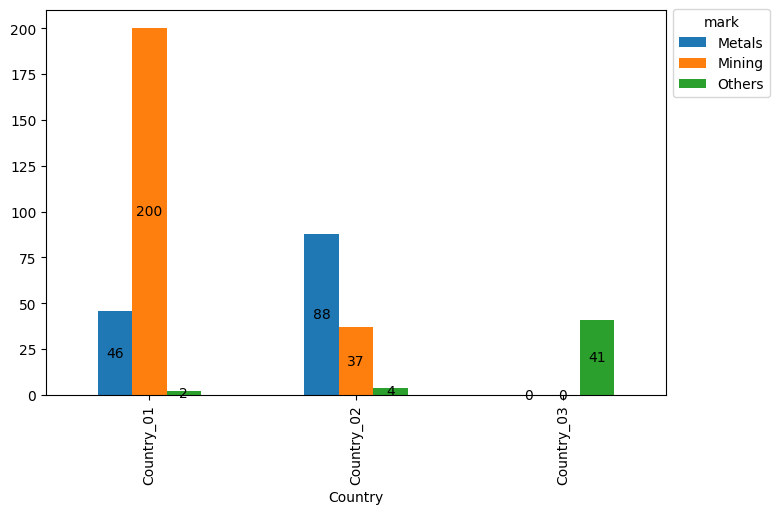

In [85]:
# Check proportion of Industry sector in different countries
crosstab_feature(is_df, 'Country', 'Industry Sector', False)

`Country_01` has highest percentage of accidents occuring is `Mining` industy, `Country_02` has highest percentage of accidents occurring in `Metal` industry, `Country_03` has highest percentage of accidents occurring in `Others` industry.

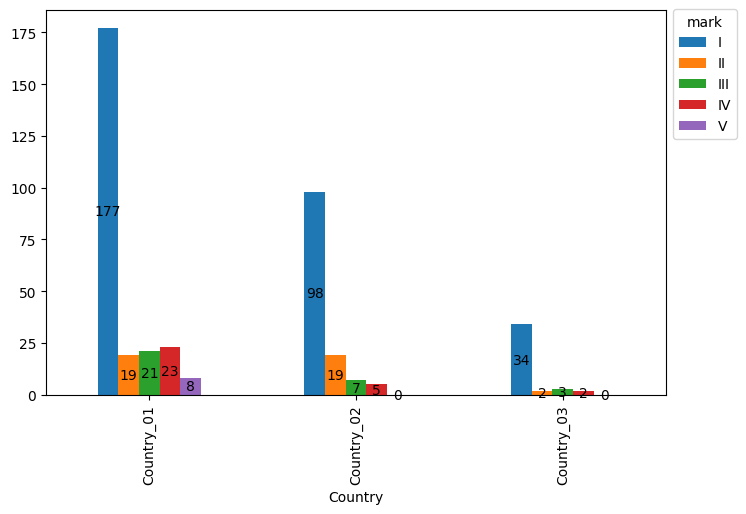

In [86]:
# Proportion of accident level in different coutries
crosstab_feature(is_df, 'Country', 'Accident Level', False)

# Treating Attribute data

In [87]:
# Label encoding
is_df['Gender'] = is_df['Gender'].apply(lambda x: {'Male': 0, 'Female': 1}[x])
is_df['Accident Level'] = is_df['Accident Level'].apply(lambda x: {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}[x])
is_df['Potential Accident Level'] = is_df['Potential Accident Level'].apply(lambda x: {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}[x])

is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    int64         
 5   Potential Accident Level  418 non-null    int64         
 6   Gender                    418 non-null    int64         
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 32.8+ KB


In [88]:
# Dropping datetime info
is_df.drop(['Date'], axis=1, inplace=True)

In [89]:
# One-hot encoding
is_df = pd.get_dummies(is_df, columns=['Country', 'Local', 'Industry Sector', 'Employee or Third Party', 'Critical Risk'], dtype=np.int64)

In [90]:
is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Accident Level                                           418 non-null    int64 
 1   Potential Accident Level                                 418 non-null    int64 
 2   Gender                                                   418 non-null    int64 
 3   Description                                              418 non-null    object
 4   Country_Country_01                                       418 non-null    int64 
 5   Country_Country_02                                       418 non-null    int64 
 6   Country_Country_03                                       418 non-null    int64 
 7   Local_Local_01                                           418 non-null    int64 
 8   Local_Local_02                          

# Description

In [30]:
# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')  

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# To lowercase
is_df['Description_T'] = is_df['Description'].apply(lambda x: x.lower())

In [32]:
# Removing non-alphanumeric chars
is_df['Description_T'] = is_df['Description_T'].apply(lambda x: ''.join(re.sub('[^A-Za-z0-9]+', ' ', x)))

In [33]:
# Removing extra white spaces
is_df['Description_T'] = is_df['Description_T'].str.strip()

In [34]:
# Stopword removal
is_df['Description_T'] = is_df['Description_T'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [35]:
is_df.loc[0:10, ['Description', 'Description_T']]

,Description,Description_T
0,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo 08 maintenance superv...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,In the sub-station MILPO located at level +170...,sub station milpo located level 170 collaborat...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...
4,Approximately at 11:45 a.m. in circumstances t...,approximately 11 45 circumstances mechanics an...
5,During the unloading operation of the ustulado...,unloading operation ustulado bag need unclog d...
6,The collaborator reports that he was on street...,collaborator reports street 09 holding left ha...
7,"At approximately 04:50 p.m., when the mechanic...",approximately 04 50 p mechanic technician jos ...
8,Employee was sitting in the resting area at le...,employee sitting resting area level 326 raise ...
9,At the moment the forklift operator went to ma...,moment forklift operator went manipulate big b...


In [37]:
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
is_df['Description_WL'] = is_df.apply(lambda row: nltk.word_tokenize(row['Description_T']), axis=1)
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return ' '.join(new_words)
is_df['Description_WL'] = is_df.apply(lambda x: lemmatize_list(x['Description_WL']), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [39]:
is_df.loc[0:10, ['Description', 'Description_WL']]

,Description,Description_WL
0,While removing the drill rod of the Jumbo 08 f...,remove drill rod jumbo 08 maintenance supervis...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump pip uncouple s...
2,In the sub-station MILPO located at level +170...,sub station milpo locate level 170 collaborato...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...
4,Approximately at 11:45 a.m. in circumstances t...,approximately 11 45 circumstances mechanics an...
5,During the unloading operation of the ustulado...,unload operation ustulado bag need unclog disc...
6,The collaborator reports that he was on street...,collaborator report street 09 hold leave hand ...
7,"At approximately 04:50 p.m., when the mechanic...",approximately 04 50 p mechanic technician jos ...
8,Employee was sitting in the resting area at le...,employee sit rest area level 326 raise bore su...
9,At the moment the forklift operator went to ma...,moment forklift operator go manipulate big bag...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_df = pd.DataFrame()
for i in [1,2,3,4]:
    tfidf = TfidfVectorizer(max_features=1000, stop_words='english',use_idf=True, ngram_range=(i,i))
    X = tfidf.fit_transform(is_df['Cleansed_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in tfidf.get_feature_names_out()])
    tfidf_df = pd.concat([tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

tfidf_df.head(3)

final_dataset= read_df_dummy_encoding.join(tfidf_df.reset_index(drop=True))